In [3]:
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import plotting
from scipy import stats
from sklearn import base
from sklearn import compose, impute, pipeline, preprocessing
from sklearn import linear_model, tree, ensemble, svm
from sklearn import metrics, model_selection
from sklearn.externals import joblib


In [141]:

neom_data = pd.read_csv("/Users/hiba/Downloads/neom_data.csv")


In [142]:
neom_data.head()


,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
0,01/01/2008 0:00,1012.751,14.887,2.606,2.669,105.078,43.686,0.0,0.0,0.0,0.0,0.0,0.098
1,01/01/2008 1:00,1012.917,14.429,3.363,2.667,106.699,47.442,0.0,0.0,0.0,0.0,0.0,0.098
2,01/01/2008 2:00,1012.966,14.580,3.778,3.341,112.426,48.357,0.0,0.0,0.0,0.0,0.0,0.098
3,01/01/2008 3:00,1013.247,14.390,3.507,3.141,102.371,48.125,0.0,0.0,0.0,0.0,0.0,0.098
4,01/01/2008 4:00,1013.083,14.388,3.869,3.607,111.300,49.295,0.0,0.0,0.0,0.0,0.0,0.098


In [143]:
neom_data.tail()

,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
96427,31/12/2018 19:00,1019.779,14.653,4.380,3.587,25.919,50.340,0.0,0.0,0.0,0.0,0.0,0.098
96428,31/12/2018 20:00,1019.578,13.965,2.853,2.836,35.203,47.381,0.0,0.0,0.0,0.0,0.0,0.098
96429,31/12/2018 21:00,1019.172,13.624,1.923,1.922,85.974,45.275,0.0,0.0,0.0,0.0,0.0,0.098
96430,31/12/2018 22:00,1018.610,13.918,1.512,2.512,103.656,43.211,0.0,0.0,0.0,0.0,0.0,0.098
96431,31/12/2018 23:00,1018.611,13.442,0.733,3.146,91.084,41.836,0.0,0.0,0.0,0.0,0.0,0.098


In [144]:
neom_data.describe()

,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,1010.110794,24.896298,11.045605,3.991582,164.200525,46.168410,274.757261,211.082623,331.746291,63.674490,0.009041,0.098086
std,5.613583,6.382410,7.153472,2.485326,102.793404,17.874776,355.287896,296.287340,390.765915,91.856426,0.173081,0.000805
min,996.378000,4.571000,-22.946000,0.076000,0.672000,5.708000,0.000000,0.000000,0.000000,0.000000,-0.037000,0.096000
25%,1005.539750,20.221000,5.889750,2.152000,62.935500,32.173000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
50%,1010.050000,25.421000,11.324500,3.437000,149.692000,44.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
75%,1014.316000,29.466000,16.581250,5.342000,265.977750,58.859000,579.205250,429.275500,788.745750,121.765250,0.000000,0.099000
max,1029.022000,44.186000,27.196000,16.716000,359.620000,99.929000,1103.190000,954.562000,989.816000,856.685000,14.038000,0.100000


In [145]:
neom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 13 columns):
Dateform           96432 non-null object
mslp(hPa)          96432 non-null float64
t2(C)              96432 non-null float64
td2(C)             96432 non-null float64
wind_speed(m/s)    96432 non-null float64
wind_dir(Deg)      96432 non-null float64
rh(%)              96432 non-null float64
GHI                96432 non-null float64
SWDIR(W/m2)        96432 non-null float64
SWDNI(W/m2)        96432 non-null float64
SWDIF(W/m2)        96432 non-null float64
rain(mm)           96432 non-null float64
AOD                96432 non-null float64
dtypes: float64(12), object(1)
memory usage: 9.6+ MB


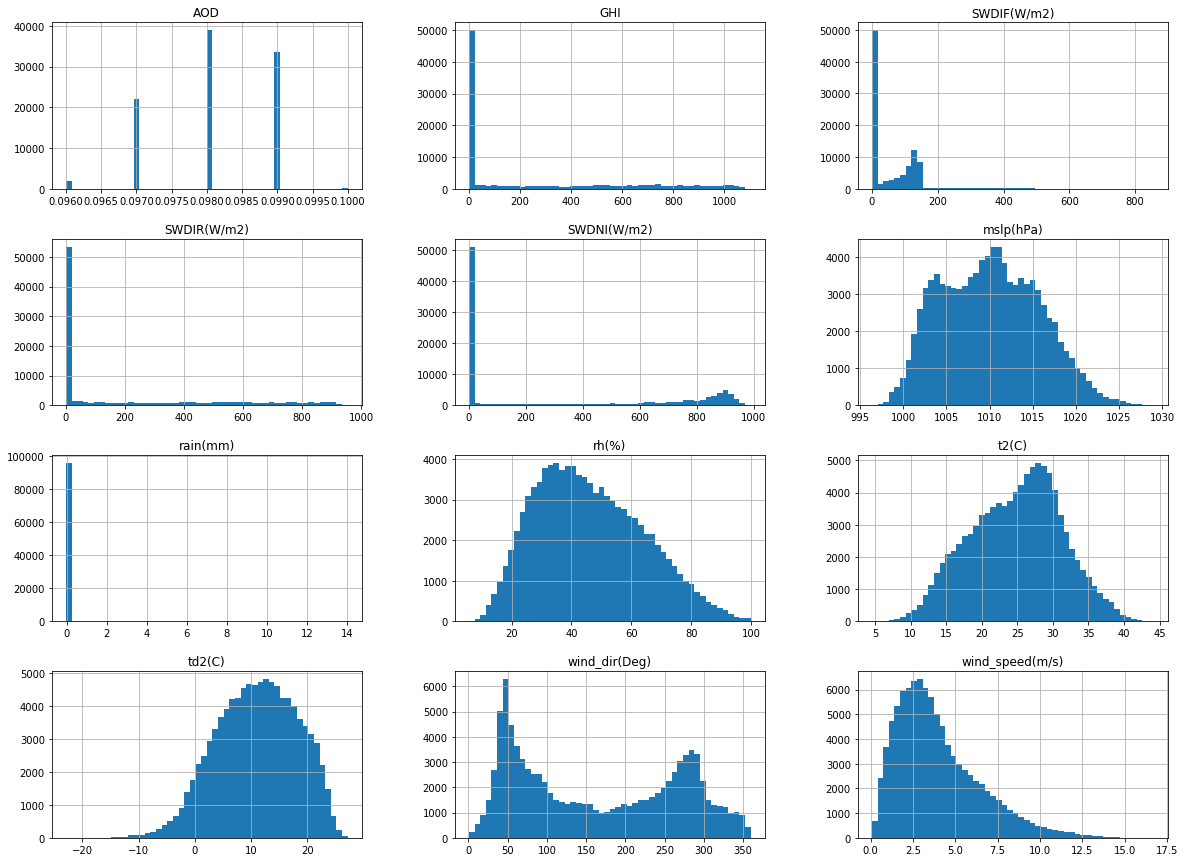

In [146]:
_ = neom_data.hist(bins=50, figsize=(20, 15))

In [148]:
neom_data2 = pd.read_csv("/Users/hiba/Downloads/neom_data.csv", usecols = ['Dateform','t2(C)','GHI'])

In [149]:
neom_data2.head()


,Dateform,t2(C),GHI
0,01/01/2008 0:00,14.887,0.0
1,01/01/2008 1:00,14.429,0.0
2,01/01/2008 2:00,14.580,0.0
3,01/01/2008 3:00,14.390,0.0
4,01/01/2008 4:00,14.388,0.0


In [380]:

neom_data_clean= neom_data2[neom_data2.GHI!=0]
neom_data2[neom_data2.GHI!=0]

,Dateform,t2(C),GHI
5,01/01/2008 5:00,14.838,35.065
6,01/01/2008 6:00,17.561,172.900
7,01/01/2008 7:00,20.277,333.671
8,01/01/2008 8:00,21.085,506.559
9,01/01/2008 9:00,21.149,598.190
10,01/01/2008 10:00,20.749,622.619
11,01/01/2008 11:00,20.601,548.236
12,01/01/2008 12:00,20.785,412.398
13,01/01/2008 13:00,20.837,286.396
14,01/01/2008 14:00,20.723,123.428


In [382]:
neom_data_clean['Dateform']= pd.to_datetime(neom_data_clean['Dateform'])
neom_data_clean.head()



/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Dateform,t2(C),GHI
5,2008-01-01 05:00:00,14.838,35.065
6,2008-01-01 06:00:00,17.561,172.900
7,2008-01-01 07:00:00,20.277,333.671
8,2008-01-01 08:00:00,21.085,506.559
9,2008-01-01 09:00:00,21.149,598.190


In [387]:
neom_data_clean['month'] = [d.date().month for d in neom_data_clean['Dateform']]
neom_data_clean['year'] = [d.date().year for d in neom_data_clean['Dateform']]
neom_data_clean['day'] = [d.date().day for d in neom_data_clean['Dateform']]
neom_data_clean['new_time'] = [d.time().hour for d in neom_data_clean['Dateform']]
neom_data_clean.head()


/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Dateform,t2(C),GHI,month,year,day,new_time
5,2008-01-01 05:00:00,14.838,35.065,1,2008,1,5
6,2008-01-01 06:00:00,17.561,172.900,1,2008,1,6
7,2008-01-01 07:00:00,20.277,333.671,1,2008,1,7
8,2008-01-01 08:00:00,21.085,506.559,1,2008,1,8
9,2008-01-01 09:00:00,21.149,598.190,1,2008,1,9


In [388]:
neom_data_clean.describe()

,t2(C),GHI,month,year,day,new_time
count,48177.000000,48177.000000,48177.000000,48177.000000,48177.000000,48177.00000
mean,27.328569,549.959363,6.458289,2012.999377,15.744235,9.73506
std,6.030154,318.296807,3.355570,3.162475,8.788173,3.52296
min,5.156000,0.011000,1.000000,2008.000000,1.000000,3.00000
25%,23.048000,275.987000,4.000000,2010.000000,8.000000,7.00000
50%,27.856000,579.651000,6.000000,2013.000000,16.000000,10.00000
75%,31.610000,819.699000,9.000000,2016.000000,23.000000,13.00000
max,44.186000,1103.190000,12.000000,2018.000000,31.000000,16.00000


In [392]:
neom_data_clean.to_excel(r'/Users/hiba/Downloads/newneom2.xlsx')

In [368]:
del neom_data_clean['Dateform']
neom_data_clean.head()

,t2(C),GHI,month,new_time
5,14.838,35.065,1,5
6,17.561,172.900,1,6
7,20.277,333.671,1,7
8,21.085,506.559,1,8
9,21.149,598.190,1,9


In [370]:
#data = neom_data_clean.split('\n')
X = neom_data_clean.iloc[:, [2,3,0]]
y = neom_data_clean["GHI"]
X.head()

,month,new_time,t2(C)
5,1,5,14.838
6,1,6,17.561
7,1,7,20.277
8,1,8,21.085
9,1,9,21.149


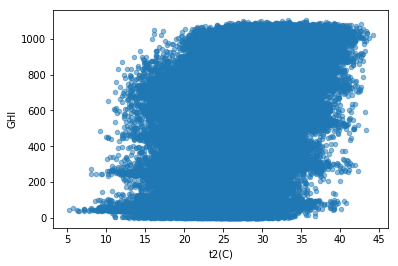

In [371]:
neom_data_clean.plot(kind="scatter",x="t2(C)", y="GHI", alpha=0.5)

In [336]:
#understand data
#splitting into training and validation (stratified random sampling)
#standardize the data
#sampling more training means better model
#use SVM by trying different c hyperparameter which controls margin, smalled C is better performance
#evalute the model by using test data and apply the model get predicted labels and compare with the target
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR 
import numpy as np


In [372]:
_prng = np.random.RandomState(42)


X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=_prng)


In [373]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38541 entries, 15941 to 31424
Data columns (total 3 columns):
month       38541 non-null int64
new_time    38541 non-null int64
t2(C)       38541 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [374]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9636 entries, 3220 to 89703
Data columns (total 3 columns):
month       9636 non-null int64
new_time    9636 non-null int64
t2(C)       9636 non-null float64
dtypes: float64(1), int64(2)
memory usage: 301.1 KB


In [386]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



/Users/hiba/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hiba/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [385]:
lin_svr = LinearSVR(random_state=42, C=1)
lin_svr.fit(X_train,y_train)

LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [384]:
y_pred = lin_svr.predict(X_test)
y_pred

array([621.31499586, 776.2996186 , 598.82761858, ..., 780.62643797,
       451.76620845, 576.54609811])

In [383]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

296.2266301431355